In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Glimpse Df

La siguiente funcion se llama glimpse_df. Nos ayuda a darnos una idea basica  de como vienen los datos.

In [3]:
def glimpse_df(df):
  print('               Head              \n')
  print(df.head())
  print("\n  --------------------------- \n")
  print('               Info              \n')
  print(df.info())
  print("\n  --------------------------- \n")
  print("              Describe           \n")
  print(df.describe())
  print("\n  --------------------------- \n")
  print("                NaN              \n")
  df_ = df[df.isna().any(axis=1)]
  print(df_)

Misma funcion, pero mas modular:

In [4]:
# Podemos separarla en funciones mas modulares
def print_s():
    print("\n  --------------------------- \n")

def glimpse_df(df):
  print('               Head              \n')
  print(df.head())
  print_s()  
  print('               Info              \n')
  print(df.info())
  print_s()
  print("              Describe           \n")
  print(df.describe())
  print_s()
  print("                NaN              \n")
  df_ = df[df.isna().any(axis=1)]
  print(df_)

Glimpse Column  

Version 1.0

In [5]:


def glimpse_columns(df=pd.DataFrame()):
  for c in df.columns:
    print_s()
    print(c)
    print(df[c].unique())

Version 2.0

In [6]:
# Valores unicos en un subset de columnas
def glimpse_pair_columns(df=pd.DataFrame, x=[]):
  print(df[x].drop_duplicates())

# Pinguinos

In [7]:
penguins = sns.load_dataset('penguins')
glimpse_df(penguins)

               Head              

  species     island  culmen_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen              39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen              39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen              40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen               NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen              36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342

In [8]:
glimpse_columns(penguins)


  --------------------------- 

species
['Adelie' 'Chinstrap' 'Gentoo']

  --------------------------- 

island
['Torgersen' 'Biscoe' 'Dream']

  --------------------------- 

culmen_length_mm
[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7
 45.2 46.1 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5
 50.6 46.7 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9
 45.5 50.8 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8
 55.8 43.5 49.6 48.7 43.3 48.4 45.1 46.3 44.5 47.8 48.2 47.3 59.6 49.1
 42.6 44.4 44.  45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5
 47.4 43.4 52.1 49.4 55.9

### Todas las islas tendran 'nans' en la solumna de sexo?  
Hagamos uso de la funcion glimpse_pair_columns

In [9]:
glimpse_pair_columns(penguins, ['sex', 'island'])

        sex     island
0      MALE  Torgersen
1    FEMALE  Torgersen
3       NaN  Torgersen
20   FEMALE     Biscoe
21     MALE     Biscoe
30   FEMALE      Dream
31     MALE      Dream
47      NaN      Dream
246     NaN     Biscoe


Al parecer todas las islas tienen pinguinos sin sexo detecatado.


# TAREA:  
### 1. Cada isla contendra los 3 tipos de especies?  
### 2. Cada columna tiene el tipo correcto (object, float, etc...)  
### 3. Los datos estan en formato Tidy?

# UFO

A continuacion analisaremos el set de datos UFO. Lo puedes buscar en Kaggle (Tip: Usa Goolge)

In [10]:
ufo = pd.read_csv('https://raw.githubusercontent.com/IEXE-Tec/analisis-descriptivo/master/ufo.csv')
glimpse_df(ufo)

               Head              

           datetime                  city  ...    latitude  longitude 
0  10/10/1949 20:30            san marcos  ...  29.8830556  -97.941111
1  10/10/1949 21:00          lackland afb  ...    29.38421  -98.581082
2  10/10/1955 17:00  chester (uk/england)  ...        53.2   -2.916667
3  10/10/1956 21:00                  edna  ...  28.9783333  -96.645833
4  10/10/1960 20:00               kaneohe  ...  21.4180556 -157.803611

[5 rows x 11 columns]

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Tarea
### Verifica que cada columna tenga el tipo de dato que le corresponda  
### La base esta en formato tidy?
### Que interpretacion tiene la media de la longitud?

# Yogurt

Con la finalidad de entender un poco mejor el proceso, generemos una serie de datos dummy. En este caso representaran las ventas de yogurt a nivel nacional.

               Head              

       ventas     precio          producto
0   97.113823  10.809959  Alto en Calorias
1  105.420701  13.491615  Alto en Calorias
2   98.600275   9.300384  Alto en Calorias
3  100.083864   5.718565  Alto en Calorias
4  103.461710   5.142385  Alto en Calorias

  --------------------------- 

               Info              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ventas    1000 non-null   float64
 1   precio    1000 non-null   float64
 2   producto  1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None

  --------------------------- 

              Describe           

            ventas       precio
count  1000.000000  1000.000000
mean    100.037989     8.948582
std       3.173521     3.179653
min      87.149883    -1.574783
25%      98.006461     6.632991
50%     100.022477   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


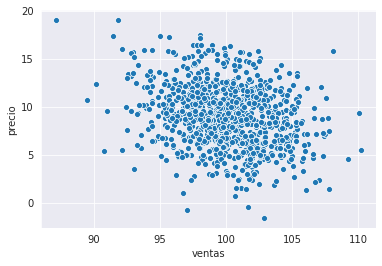

In [39]:
np.random.seed(64673)
n = 1000

# Productos
from random import choices
producto = ['Bajo en Calorias', 'Alto en Calorias']
producto = random.choices(producto, k=n)

# Generemos las Ventas
yogurt = np.random.multivariate_normal([100,9], 
          cov = [[5, -10], [-10, 1]], size=(n))

yogurt = pd.DataFrame(yogurt, columns=['ventas', 'precio'])
yogurt['producto'] = producto

# Glimpse
glimpse_df(yogurt)
sns.scatterplot(data=yogurt, x='ventas', y ='precio')


# Tarea
